## Final Term Project and Presentation Proposal

#### Group 2, By Kerim Terzioglu, Jitendrakumar Prajapati, Masthanaiah Pelluri, and Jinsong Shi


### Project Requirement

Final Term Project and Presentation Proposal

Due Apr 16 by 6pm  Points 30  Submitting a file upload

#### Description
The final term project is an opportunity to apply the concepts learned during the course to a real life or ‘simulated’ real life situation. Simulated in this context means that you can use data from a data science repository if you don’t have access or cannot find real data from work or any other source. Choose one, or some combination of the following for your project:

* Make a hypothesis about a correlation in a dataset and test the hypothesis using a statistical inference technique (such as the t-test)
* Build a predictive model using one of the techniques covered in the course i.e. ordinary least squares regression or Naïve Bayes

#### Data
The following are links to a variety of interesting datasets.  The dataset you use does not need to be from this list.  You can use any source as long as it is open data or you have written approval to use it.

* https://www.kaggle.com/datasets (Links to an external site.)Links to an external site.
* https://www.analyticsvidhya.com/blog/2016/11/25-websites-to-find-datasets-for-data-science-projects/ (Links to an external site.)Links to an external site. 
* https://www.ontario.ca/search/data-catalogue?sort=asc (Links to an external site.)Links to an external site. 
* http://open.canada.ca/en/open-data (Links to an external site.)Links to an external site. 
* http://blog.yhat.com/posts/7-funny-datasets.html (Links to an external site.)Links to an external site. 
* http://koaning.io/fun-datasets.html                                          (Links to an external site.)Links to an external site. (Links to an external site.)Links to an external site.https://www.toronto.ca/city-government/data-research-maps/open-data/ (Links to an external site.)Links to an external site.

#### Topic Approval
Prior instructor approval of your choice of project is recommended but not required.

#### Requirements & Due Dates
You must submit two documents, a report (Word document/PDF) and a presentation (PPT/PDF). The report and presentation are due the last class of the term before class begins.

#### Report
The report should be organized into the following four sections and should be of a quality that is suitable for presentation to senior management:

* Objective: What are you setting out to prove or predict?  What is your rationale for there being a correlation in the data that you’re looking to confirm and/or exploit?
* Data Preparation: What was your data source (e.g. web scraping, corporate data, a standard machine learning data set, open data, etc.)?  How good was the data quality?  What did you need to do to procure it?  What tools or code did you need to use to prepare it for analysis?  What challenges did you face?
* Analysis or Model: If you’re conducting an inference test explain the analysis you performed clearly and include well-labeled diagrams to make your points.  If you chose to do a predictive model, explain the model, how you trained and tested it, and how well it works.  How did you confirm that the data met the requirements for the test or modeling technique to be valid?
* Conclusions: Did you prove/disprove your hypothesis or create a useful model?  What did you learn about your data set?

The report should be about 8-10 pages in length (longer is fine if there are multiple graphical elements). If there is additional information e.g. code, samples of data, etc. this should be in an appendix.

#### Presentation

The presentation should be 5-8 PowerPoint slides long (excluding title slide), one for each of the four report sections plus a few for additional background or diagrams at your discretion.  You will only have 10 minutes to present, which will go by quickly, so please rehearse and time your presentation in advance.

#### Marking Scheme

Marks will be allocated as follows for a total out of 30:

* Suitability as a report and presentation to management – 10 marks (flow, clarity, etc)
* Statistical correctness - 10 marks (use of appropriate techniques, correct interpretation)
* Plausibility of conclusions - 5 marks
* Novelty - 5 marks (is this an interesting and different analysis?)
* Please have one student from the group submit the necessary files (Slides, Report + Appendix). All other group members should create a submission that contains only their project title and names of their partners.

## Project Description

Group 2 decided to use Kaggle data sets to improve customer retention using Telco Customer Churn Data Set for customer behavior

##### Data Set Link 
https://www.kaggle.com/blastchar/telco-customer-churn



### What’s in the Telco Customer Churn data set?
This data set provides info to help Telco to predict behavior to retain their customers. We can analyze all relevant customer data and develop focused customer retention programs.

A telecommunications company is concerned about the number of customers leaving their landline business for cable competitors. They need to understand who is leaving. Imagine that as an analyst at this company and we have to find out who is leaving and why.

### The data set includes information about:

* Customers who left within the last month – the column is called Churn

* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    
* Demographic info about customers – gender, age range, and if they have partners and dependents

### Inspiration
To explore this type of models and learn more about the subject.

##### Importing required library 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score  
sns.set(style = 'white')
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

##### Reading the data set from WA_Fn-UseC_-Telco-Customer-Churn.csv to dataframe and have a look at the data set



In [2]:
df_telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_telco.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ...  DeviceProtection  \
0  No phone service             DSL             No  ...                No   
1                No             DSL            Yes  ...               Yes   
2                No             DSL            Yes  ...                No   
3  No phone service             DSL            Yes  ...               Yes   
4                No     Fiber optic             No  ...                No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
df_telco.describe(include= 'all')

customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     7136-RVDTZ   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...   \
count          7043          7043            7043           7043  ...    
unique            2             3               3              3  ...    
top             Yes            No     Fiber optic             No  ...    
freq           6361          3390            3096           3498  ...    
mean            NaN           NaN             NaN            NaN  ...    
std             NaN           NaN             NaN            NaN  ...    
min             NaN           NaN             NaN            NaN  ...    
25%             NaN           NaN             NaN            NaN  ...    
50%             NaN           NaN             NaN            NaN  ...    
75%             NaN           NaN             NaN            NaN  ...    
max             NaN           NaN             NaN            NaN  ...    

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7043        7043        7043            7043   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3095        3473        2810            2785   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod MonthlyCharges  \
count             7043             7043              7043    7043.000000   
unique               3                2                 4            NaN   
top     Month-to-month              Yes  Electronic check            NaN   
freq              3875             4171              2365            NaN   
mean               NaN              NaN               NaN      64.761692   
std                NaN              NaN               NaN      30.090047   
min                NaN              NaN               NaN      18.250000   
25%                NaN              NaN               NaN      35.500000   
50%                NaN              NaN               NaN      70.350000   
75%                NaN              NaN               NaN      89.850000   
max                NaN              NaN               NaN     118.750000   

        TotalCharges Churn  
count           7043  7043  
unique          6531     2  
top             20.2    No  
freq              11  5174  
mean             NaN   NaN  
std              NaN   NaN  
min              NaN   NaN  
25%              NaN   NaN  
50%              NaN   NaN  
75%              NaN   NaN  
max              NaN   NaN  

[11 rows x 21 columns]

In [4]:
df_telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df_telco.TotalCharges = pd.to_numeric(df_telco.TotalCharges, errors='coerce')
df_telco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Dataset Description
This IBM Sample Dataset has information about Telco customers and if they left the company within the last month (churn). Each row represents a unique costumer, while the columns contains information about customer’s services, account and demographic data. 

Basic information:

* Only 7043 rows
* There are 21 columns with 19 features
* Only 11 missing values (next item).

### Columns
* customerID: Customer ID
* gender: Whether the customer is a male or a female
* SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
* Partner: Whether the customer has a partner or not (Yes, No)
* Dependents: Whether the customer has dependents or not (Yes, No)
* tenure: Number of months the customer has stayed with the company
* PhoneService: Whether the customer has a phone service or not (Yes, No)
* MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract: The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer
* Churn: Whether the customer churned or not (Yes or No)


There are only 11 missing values, all of them for the TotalCharges column. This values are actually a blank space in the csv file and are exclusive for customers with zero tenure. It's possible to concluded that they are missing due to the fact that the customer never paid anything to the company. So, we filled this missing values with zero:

In [6]:
df_telco['TotalCharges'] = df_telco['TotalCharges'].fillna(0)

In [7]:
df_telco.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

#### Data Exploration

* Removed missing values
* Removed customerID column as it has all unique values and which doesn't require for prediction purpose
* Converted the "Churn" column to binary values
* Converted all the categorical columns into dummy columns

In [8]:
#Replace Species type with numbers
def transform(attribute):
    if attribute.dtype=='object':
        attribute = LabelEncoder().fit_transform(attribute)
    return attribute

# Drop some attributes
dataset = df_telco.copy()
dataset.dropna(inplace = True)
dataset.drop(['customerID'],axis=1, inplace=True)
dataset.drop(['MonthlyCharges'],axis=1, inplace=True)
dataset.drop(['TotalCharges'],axis=1, inplace=True)
dataset = dataset.apply(lambda x: transform(x))
dataset.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  Churn  
0                 1              2      0  
1                 0              3      0  
2                 1              3      1  
3                 0              0      0  
4                 1              2      1

0    5174
1    1869
Name: Churn, dtype: int64

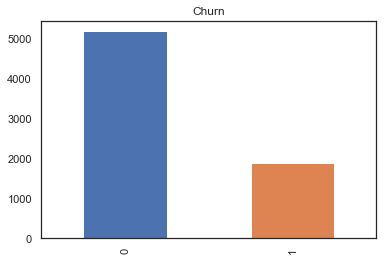

In [9]:
dataset['Churn'].value_counts().plot(kind= 'bar', title = 'Churn')
dataset['Churn'].value_counts()

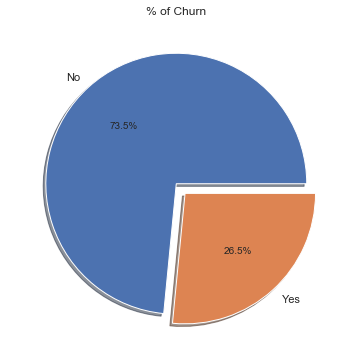

In [10]:
labels = 'No', 'Yes'
explode = (0, 0.1,)
fig1, ax1 = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect='equal'))
ax1.pie((dataset['Churn'].value_counts()*100.0 /len(dataset)), explode=explode, labels=labels, 
        autopct='%1.1f%%', shadow=True)
ax1.set_title('% of Churn', fontsize = 12)
plt.show()

Looking at the above pie chart we can conclude that almost 27% customers left the Telco service. Which is very high percentage of churn. Telco has to identify the problems and resovle it as soon as possible.

#### Attributes Selecting

1. Whether the attribute diverge: If a attribute does not diverge, for example, the variance is close to zero, that is, the sample has substantially no difference in this attribute, this attribute is not useful for distinguishing samples.

2. Correlation between attributes and target: This is more obvious, and attributes that are highly correlated with the target should be preferred.


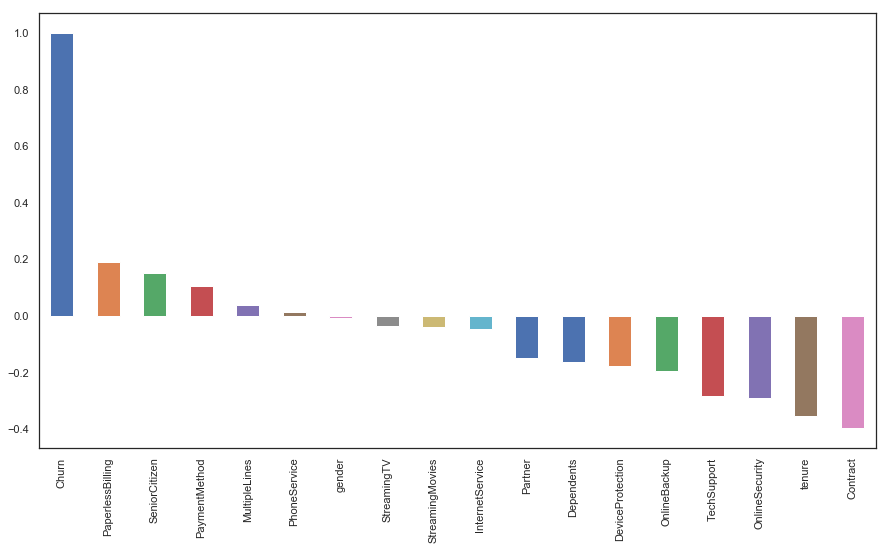

In [11]:
plt.figure(figsize=(15,8))
dataset.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Month to month contracts, absence of online security and tech support, Fiber optive Intername services are having positive correlation with churn. 

<i> Surprisingly the paperless billing is having positive correlation with churn. </i>

Tenure, Two year contracts are having negative correlation with churn.

<i> Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection ae also having negative impact to churn.</i>

Let's explore the patterns for the above correlations before creating model and identify the important variables.

In [12]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title('{} vs Churn'.format(feature))
    x1 = sns.kdeplot(df_telco[df_telco['Churn'] == 'No'][feature].dropna(), label= 'Churn: No', shade = True)
    x2 = sns.kdeplot(df_telco[df_telco['Churn'] == 'Yes'][feature].dropna(),  label= 'Churn: Yes', shade = True)

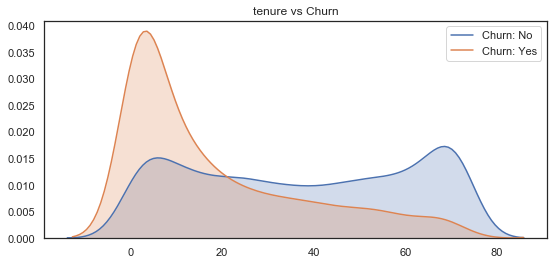

In [13]:
kdeplot('tenure')

Cusotmer who have recently join the Telco Network has very high chances of leaving the network

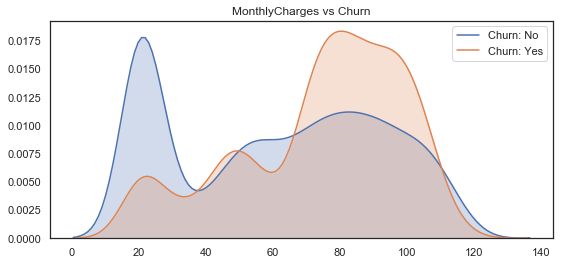

In [14]:
kdeplot('MonthlyCharges')

Cutomer who are paying high monthly charges are also likely to leave the Telco Network

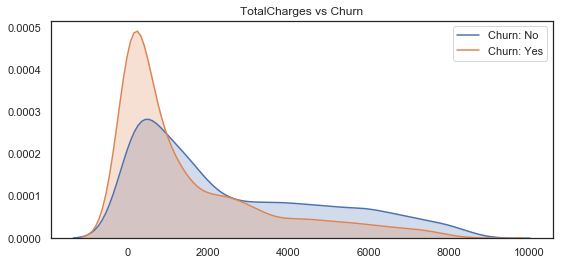

In [15]:
kdeplot('TotalCharges')

Lower Total Charges also having high churn rates

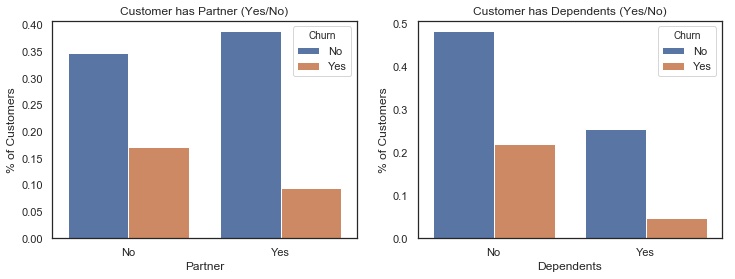

In [16]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title('Customer has Partner (Yes/No)')
axis[1].set_title('Customer has Dependents (Yes/No)')
axis_y = '% of Customers'

partner = df_telco.groupby('Partner')['Churn'].value_counts()/len(df_telco)
partner = partner.to_frame().rename({'Churn': axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=partner, ax=axis[0])

dependents = df_telco.groupby('Dependents')['Churn'].value_counts()/len(df_telco)
dependents = dependents.to_frame().rename({'Churn': axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=dependents, ax=axis[1])

Customer who doesn't have parter or dependents are more likely to churn

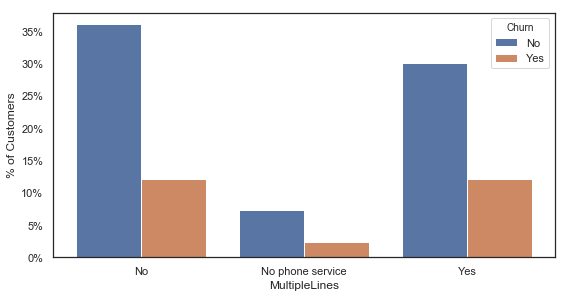

In [17]:
def percentage_plot(feature, orient='v', axis_name='% of Customers'):
    grouped = df_telco.groupby(feature)['Churn'].value_counts().to_frame()
    grouped = grouped.rename({'Churn': axis_name}, axis=1).reset_index()
    grouped[axis_name] = grouped[axis_name]/len(df_telco)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=grouped, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=grouped, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()

plt.figure(figsize=(9, 4.5))
percentage_plot('MultipleLines')

Customer with multiple lines are having higher rate of churn

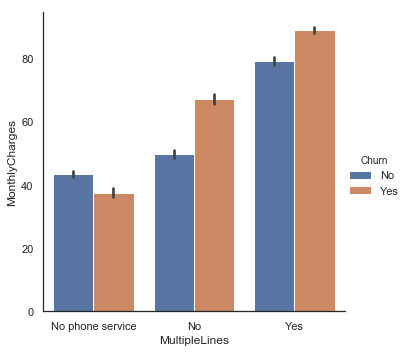

In [18]:
sns.catplot(x='MultipleLines', y='MonthlyCharges', hue='Churn', kind='bar', data=df_telco)

Customer with mulitple lines and having higher monthly charges are likely to leave the network

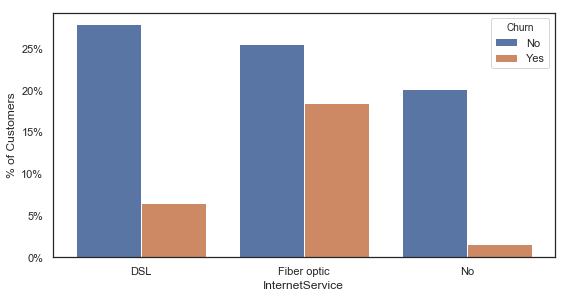

In [19]:
plt.figure(figsize=(9, 4.5))
percentage_plot('InternetService')

Customer who has fiber optic services are having higher chances of churn.

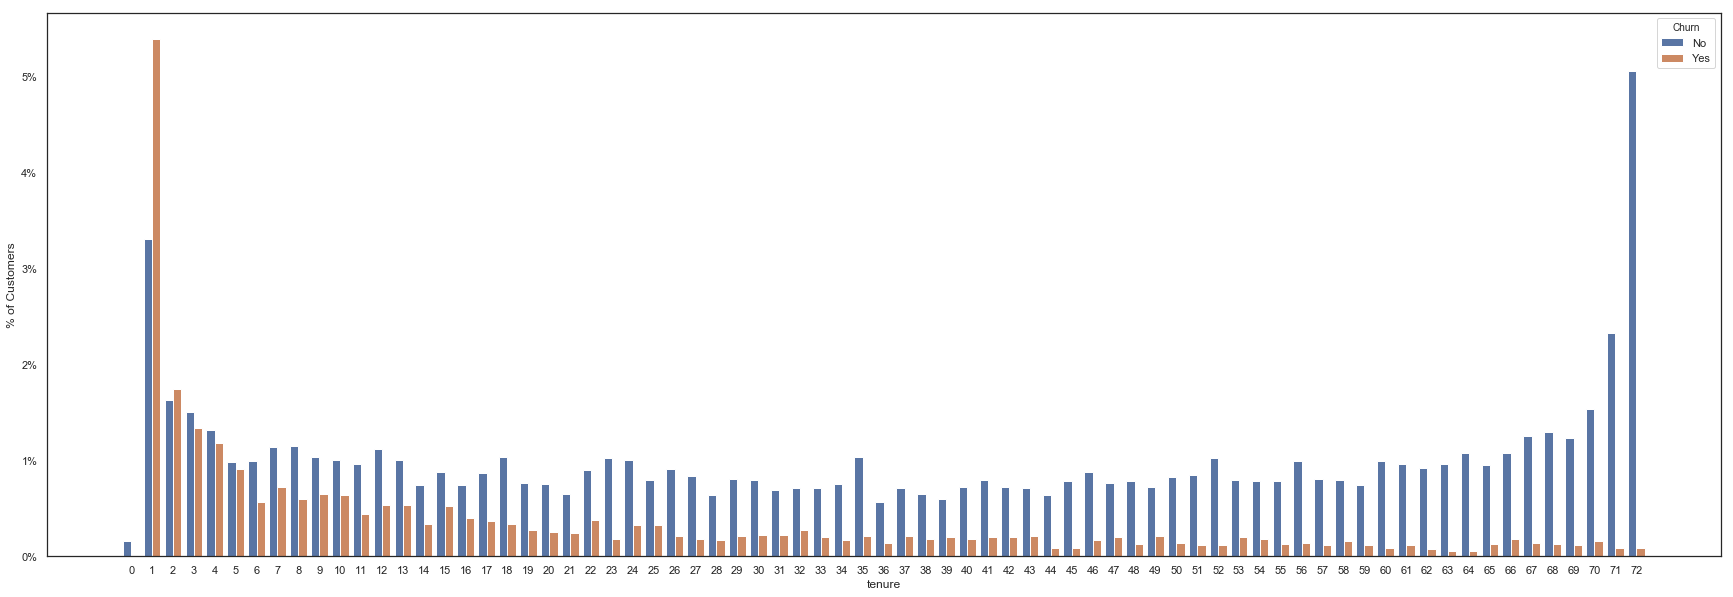

In [20]:
plt.figure(figsize=(30, 10))
percentage_plot('tenure')

Customer who have joined the network recently are more likely to churn. The longer they stay the chances of churning is less

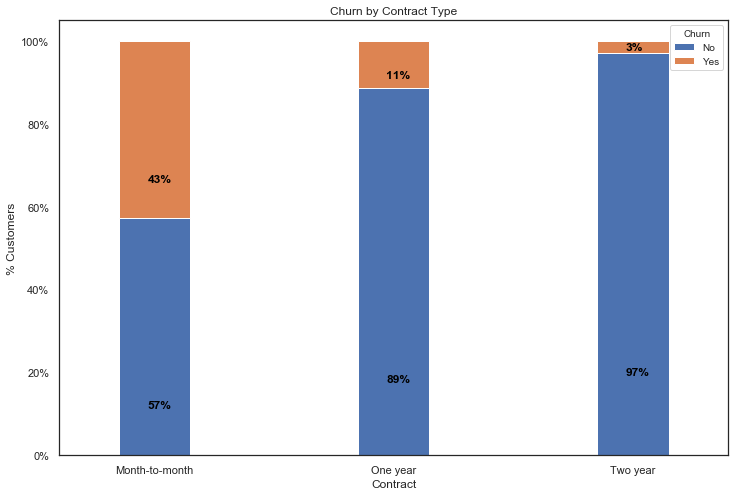

In [21]:
contract_churn = df_telco.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,8))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':10},title = 'Churn')
ax.set_ylabel('% Customers',size = 12)
ax.set_title('Churn by Contract Type',size = 12)

# Code to add the data labels on the stacked bar chart
for elm in ax.patches:
    width, height = elm.get_width(), elm.get_height()
    x, y = elm.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (elm.get_x()+.4*width, elm.get_y()+.2*height), color = 'black',
               weight = 'bold', size = 12)

Customer who has month to month contract has very high rates of churn. 

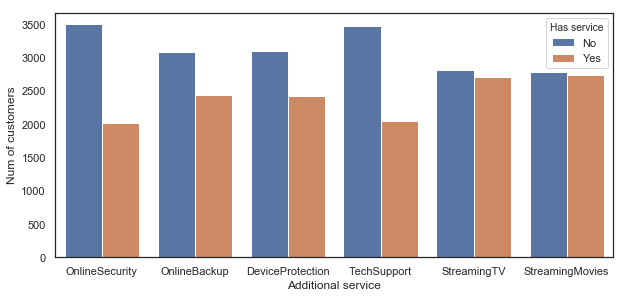

In [22]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df1 = pd.melt(df_telco[df_telco['InternetService'] != 'No'][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

Customer who has streaming services are more likely to be churned.

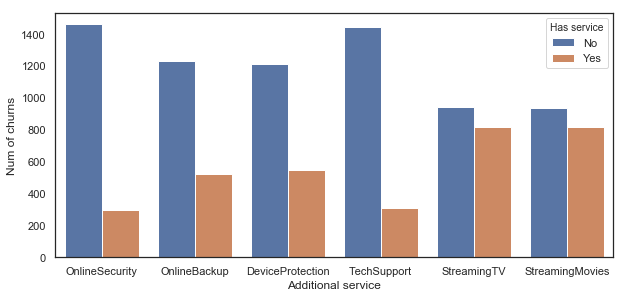

In [23]:
plt.figure(figsize=(10, 4.5))
df1 = df_telco[(df_telco.InternetService != 'No') & (df_telco.Churn == 'Yes')]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

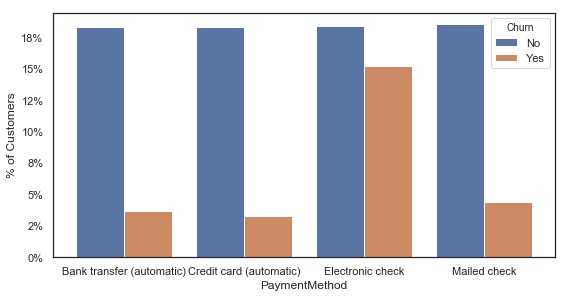

In [24]:
plt.figure(figsize=(9, 4.5))
percentage_plot('PaymentMethod')

It seems customer who are paying using online payment method are more likely to churn.

In [25]:
dataset.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

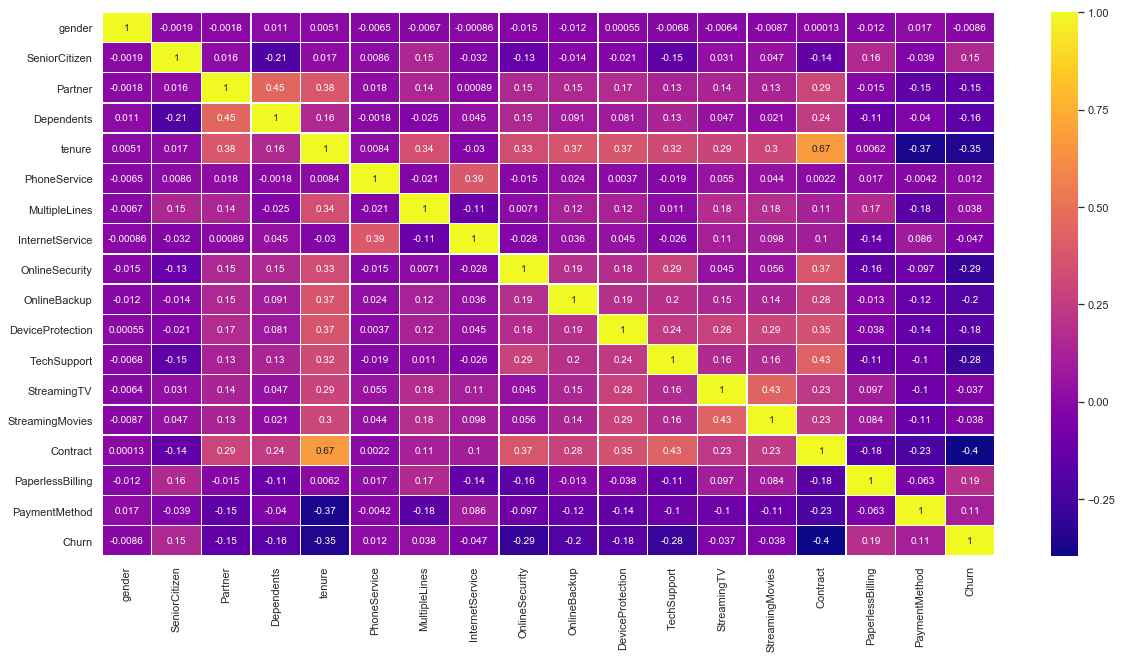

In [26]:
internal_chars = dataset.columns.tolist()
corrmat = dataset[internal_chars].corr()
f, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation='0')
plt.show(sns.heatmap(corrmat, square=False, linewidths=.5, annot=True,cmap=plt.cm.plasma))

[0.04258954 0.03763262 0.03926545 0.0327521  0.26587613 0.00623927
 0.02922221 0.03658614 0.04777969 0.03796434 0.03604689 0.0324556
 0.03263735 0.03613733 0.1799997  0.03868456 0.06813107]


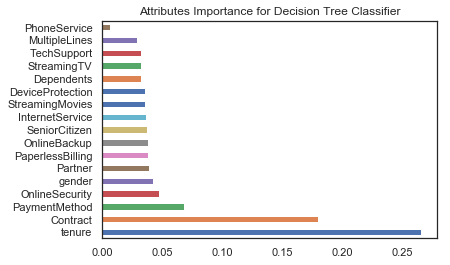

In [27]:
import pandas as pd
import numpy as np

X = dataset[['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']]  #independent columns
y = dataset['Churn']    #target column i.e price range
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
model = DecisionTreeClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.title("Attributes Importance for Decision Tree Classifier")
plt.show()

Thermal coefficient of correlation coefficient between attributes. CHoose top 10 attributes according to the importance above
To compare two classifiers, Decision Tree and Logistic Regression, choose same attributes for modeling.

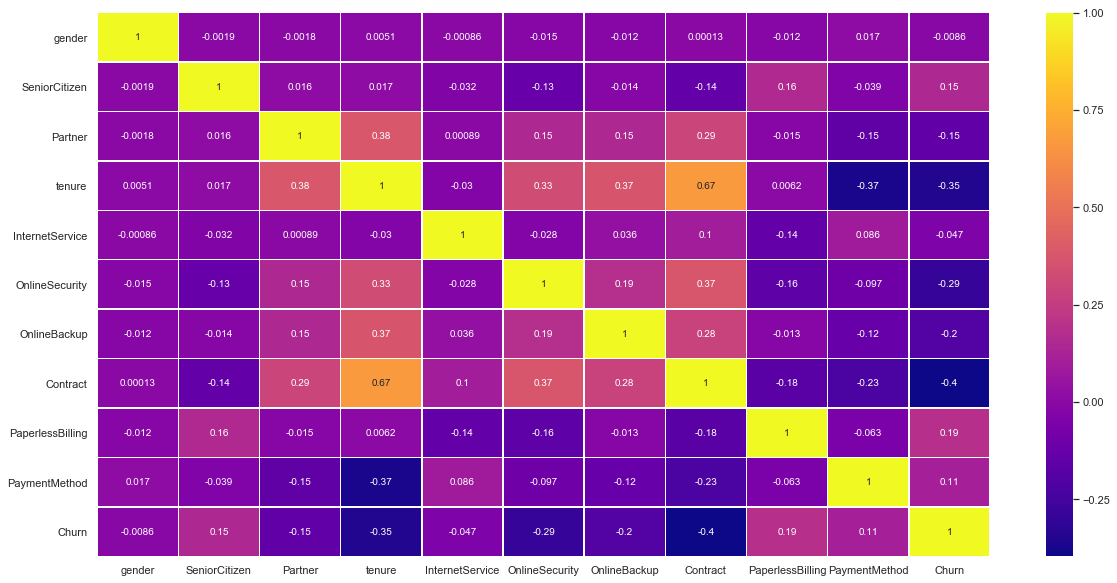

In [28]:
internal_chars = ['gender',
 'SeniorCitizen',
 'Partner',
 'tenure',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']
corrmat = dataset[internal_chars].corr()
f, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation='0')
plt.show(sns.heatmap(corrmat, square=False, linewidths=.5, annot=True,cmap=plt.cm.plasma))

#### Predictive Modeling (Classification)

In [29]:
x_columns = ['gender',
 'SeniorCitizen',
 'Partner',
 'tenure',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']
y_column = "Churn"
x = dataset.loc[:,x_columns]
x = x.values
x
y = dataset[y_column]
y = y.values
y

array([0, 0, 1, ..., 0, 1, 0])

In [30]:
test_size = 0.2
seed = 1234

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=test_size, random_state=seed)
print("The Row of Test Set: ",pd.DataFrame(y_test)[0].count())
print("In where, the Number of No Churn: ",pd.DataFrame(y_test)[0].value_counts()[0],end=', ')
print("the Number of Churn: ",pd.DataFrame(y_test)[0].value_counts()[1])

The Row of Test Set:  1409
In where, the Number of No Churn:  1046, the Number of Churn:  363


GridSearchCV implements a “fit” method and a “predict” method like any classifier except that the parameters of the classifier used to predict is optimized by cross-validation.

### Logistic Regression Classifier

In [31]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score

clf_LR = LR(solver='lbfgs',fit_intercept=True, max_iter=100000)
#Run GridSearchCV to Get hyperparameter
params={"C":[1000,100,10,1,0.2, 0.1, 0.05, 0.02, 0.01], "penalty":["l2"],"fit_intercept":[True], "max_iter":[100000]}
clf_LR = GridSearchCV(cv=10, estimator=clf_LR, iid=False, n_jobs=10,param_grid=params, pre_dispatch='2*n_jobs', verbose=0)
model1=clf_LR.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

In [32]:
#Use the k-fold cross-validation procedure for estimating the skill of machine learning models.
def get_accuracy(y_test, y_pred):
    ACC = accuracy_score(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_pred,y_test)
    MAE = metrics.explained_variance_score(y_test, y_pred)
    R2 = metrics.r2_score(y_test,y_pred)
    return ACC,MSE,MAE,R2
ACC1,MSE1,MAE1,R21 = get_accuracy(y_test, y_pred1)

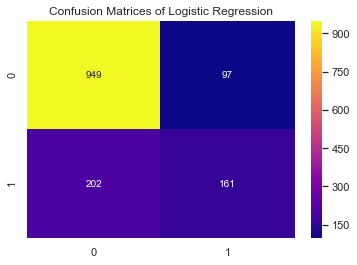

In [33]:
grad_ens_conf_matrix = metrics.confusion_matrix(y_test, y_pred1)
sns.heatmap(grad_ens_conf_matrix, annot=True, fmt='', cmap=plt.cm.plasma);
title = 'Confusion Matrices of Logistic Regression'
plt.title(title);

In [34]:
print("Model with best params is :")
print("LogisticRegression",clf_LR.best_params_)
print('Accuracy(%): ',ACC1)
print('Mean Squared Error: ',MSE1)
print('Explained Variance Score: ',MAE1)
print('R2: ',R21)

Model with best params is :
LogisticRegression {'C': 0.02, 'fit_intercept': True, 'max_iter': 100000, 'penalty': 'l2'}
Accuracy(%):  0.7877927608232789
Mean Squared Error:  0.21220723917672107
Explained Variance Score:  -0.08050608641604606
R2:  -0.10954232047574641


In [59]:
# Make predictions on validation dataset
model = LR(C=0.02)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

0.7877927608232789
[[949  97]
 [202 161]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1046
           1       0.62      0.44      0.52       363

   micro avg       0.79      0.79      0.79      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.79      0.77      1409



In [71]:
model
print("Coefs:")
for i in range(len(x_columns)):
    print(x_columns[i] +" : "+str(model.coef_[0][i]))
coefs = np.std(x_train, 0)*model.coef_
df_imp = pd.DataFrame(coefs).T
df_imp.columns=["importance"]
df_imp["labels"] = x_columns
df_imp.sort_values("importance", inplace=True, ascending=False)
display(df_imp.head(5))
display(df_imp.tail(5))

LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Coefs:
gender : -0.057278566643263314
SeniorCitizen : 0.4234715375257742
Partner : -0.02287908951716925
tenure : -0.0216562482172113
InternetService : -0.014352852721275634
OnlineSecurity : -0.4202692272839845
OnlineBackup : -0.1248571351434148
Contract : -0.8748567418920511
PaperlessBilling : 0.5802359315359923
PaymentMethod : -0.0028894791780650856


importance            labels
8    0.285362  PaperlessBilling
1    0.155841     SeniorCitizen
9   -0.003093     PaymentMethod
4   -0.010590   InternetService
2   -0.011437           Partner

importance          labels
0   -0.028636          gender
6   -0.109634    OnlineBackup
5   -0.360416  OnlineSecurity
3   -0.531188          tenure
7   -0.728143        Contract

Those tables give us the most important attributes to predict if the client will leave or not, where the highest ones indicate strong chance of leaving and the lower ones indicates high chance of staying

### Decision Tree Classifer

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.core.display import HTML
import graphviz
from sklearn import tree
from IPython.core.interactiveshell import InteractiveShell
from sklearn.metrics import accuracy_score
InteractiveShell.ast_node_interactivity = "all"
def dtc(x_train,y_train,depth):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    model=tree_clf.fit(x_train, y_train)
    dot_data = export_graphviz(tree_clf, 
                 out_file=None,
               feature_names=x_columns,
               class_names=y_column,
               rounded=True,
               filled=True)
    y_pred = model.predict(x_test)
    return y_pred,dot_data,model
depth = ['2','3','4','5','6','7']
pred_report = pd.DataFrame(np.random.rand(6, 5), index=depth,
        columns=pd.Index(['Depth','Accuracy','Mean Squared Error','Explained Variance Score','R2']))
for cn in depth:
    pred_report.loc[cn] = ["","","","",""]

'tree_depth_2.png'

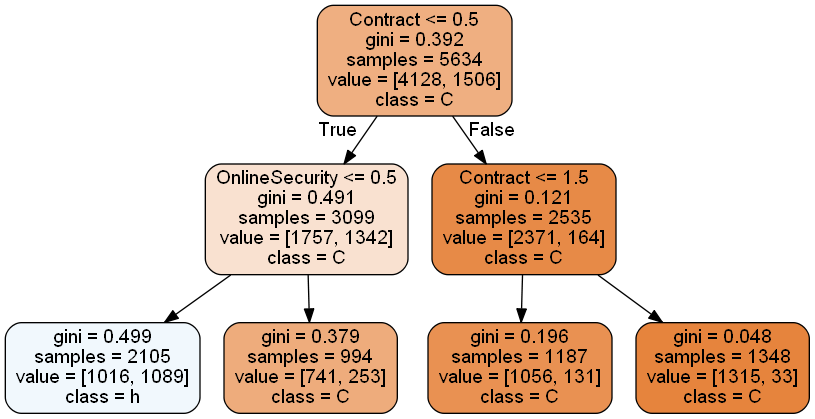

Text(0.5, 1.0, 'Confusion Matrices of Decision Tree')

Accuracy:  0.7295954577714692
Mean Squared Error:  0.2704045422285309
Explained Variance Score:  -0.34385748673946126
R2:  -0.4138315187333088


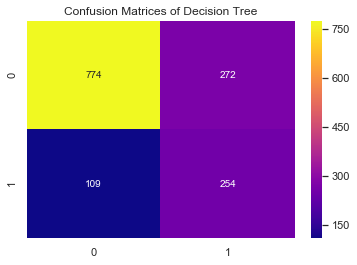

In [36]:
y_pred,dot_data,model=dtc(x_train,y_train,2)
graph = graphviz.Source(dot_data, format='png')
#graph
graph.render("tree_depth_2") # doctest: +SKIP
Image(filename = "tree_depth_2.png", width=1000, height=1000)
grad_ens_conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(grad_ens_conf_matrix, annot=True, fmt='', cmap=plt.cm.plasma);
title = 'Confusion Matrices of Decision Tree'
plt.title(title);
ACC,MSE,MAE,R2 = get_accuracy(y_test, y_pred)
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Mean Squared Error: ',MSE)
print('Explained Variance Score: ',MAE)
print('R2: ',R2)
pred_report.loc['2'] = ["2",accuracy_score(y_test, y_pred),MSE,MAE,R2]

'tree_depth_3.png'

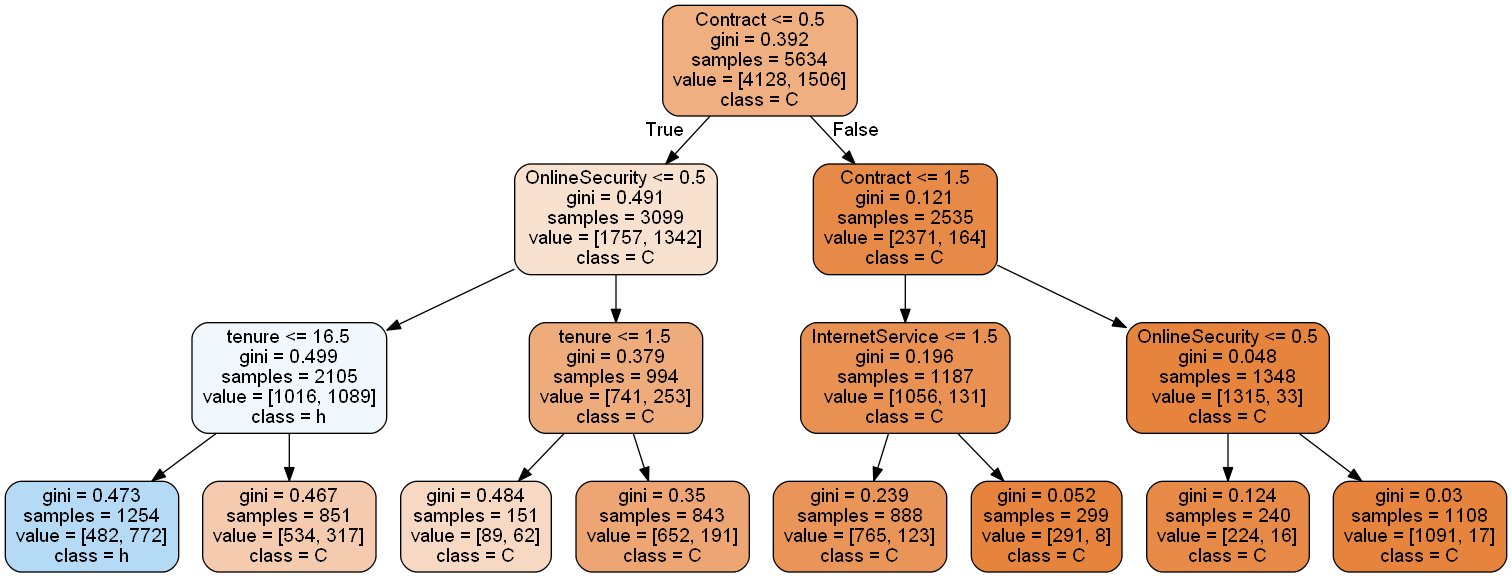

Text(0.5, 1.0, 'Confusion Matrices of Decision Tree')

Accuracy:  0.7707594038325053
Mean Squared Error:  0.22924059616749468
Explained Variance Score:  -0.19120458891013392
R2:  -0.19860257362430134


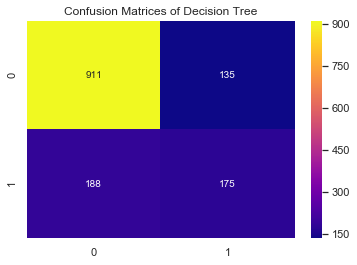

In [37]:
y_pred,dot_data,model=dtc(x_train,y_train,3)
graph = graphviz.Source(dot_data, format='png')
#graph
graph.render("tree_depth_3") # doctest: +SKIP
Image(filename = "tree_depth_3.png", width=1000, height=1000)
grad_ens_conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(grad_ens_conf_matrix, annot=True, fmt='', cmap=plt.cm.plasma);
title = 'Confusion Matrices of Decision Tree'
plt.title(title);
ACC,MSE,MAE,R2 = get_accuracy(y_test, y_pred)
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Mean Squared Error: ',MSE)
print('Explained Variance Score: ',MAE)
print('R2: ',R2)
pred_report.loc['3'] = ["3",accuracy_score(y_test, y_pred),MSE,MAE,R2]

'tree_depth_4.png'

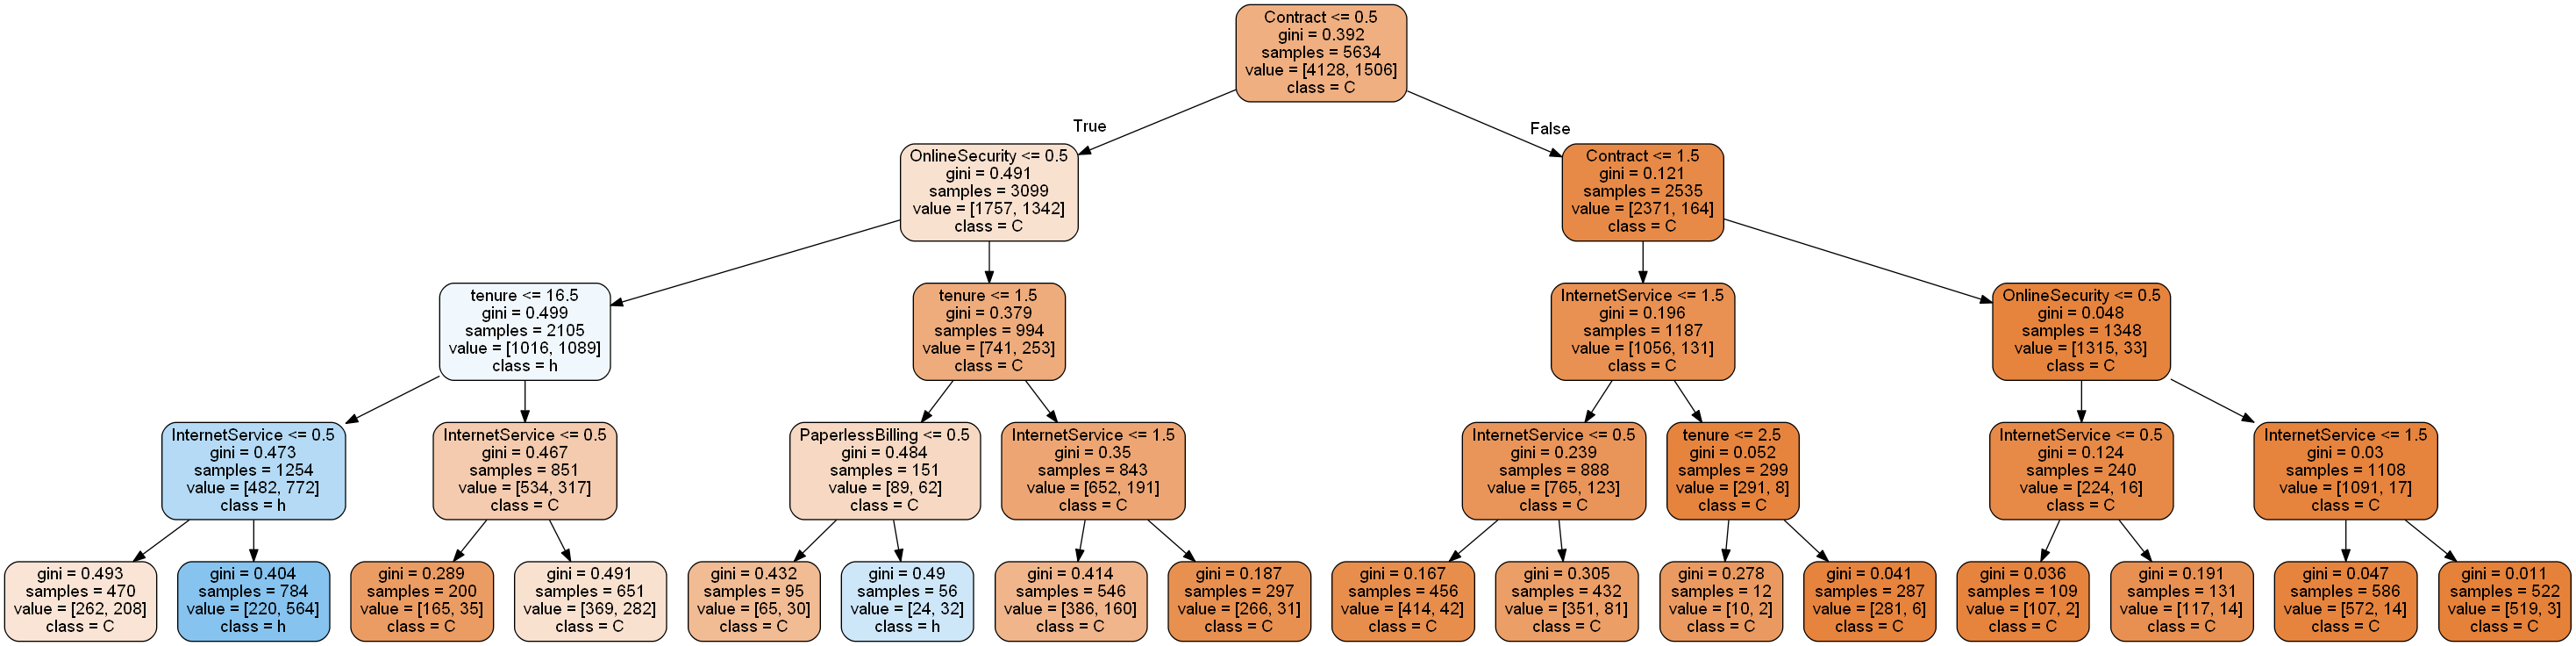

Text(0.5, 1.0, 'Confusion Matrices of Decision Tree')

Accuracy:  0.7771469127040455
Mean Squared Error:  0.22285308729595457
Explained Variance Score:  -0.09608689010740101
R2:  -0.16520497869359319


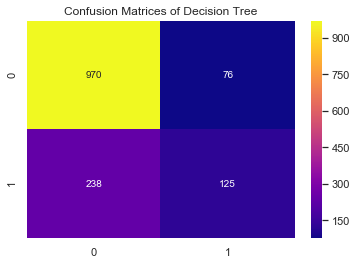

In [38]:
y_pred,dot_data,model=dtc(x_train,y_train,4)
graph = graphviz.Source(dot_data, format='png')
#graph
graph.render("tree_depth_4") # doctest: +SKIP
Image(filename = "tree_depth_4.png", width=1000, height=1000)
grad_ens_conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(grad_ens_conf_matrix, annot=True, fmt='', cmap=plt.cm.plasma);
title = 'Confusion Matrices of Decision Tree'
plt.title(title);
ACC,MSE,MAE,R2 = get_accuracy(y_test, y_pred)
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Mean Squared Error: ',MSE)
print('Explained Variance Score: ',MAE)
print('R2: ',R2)
pred_report.loc['4'] = ["4",accuracy_score(y_test, y_pred),MSE,MAE,R2]

'tree_depth_5.png'

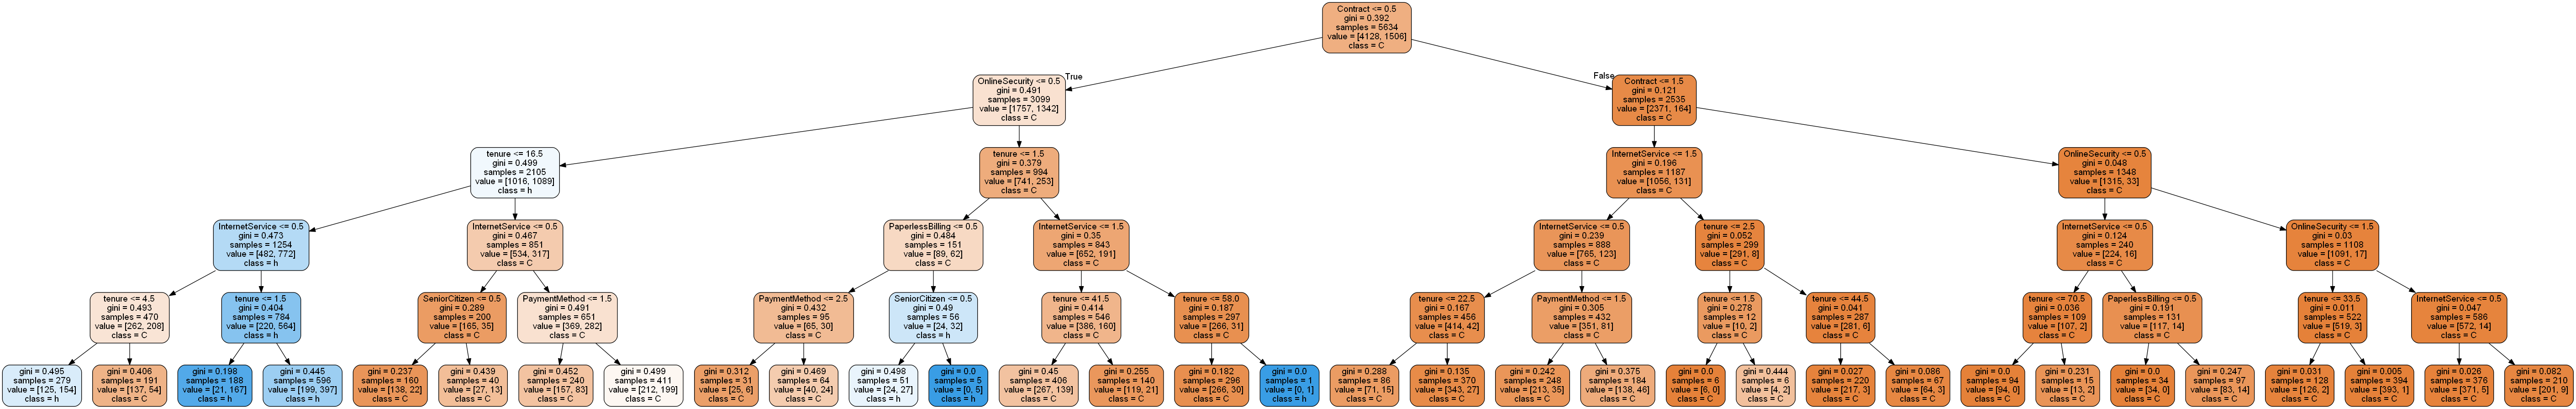

Text(0.5, 1.0, 'Confusion Matrices of Decision Tree')

Accuracy:  0.7792760823278921
Mean Squared Error:  0.2207239176721079
Explained Variance Score:  -0.13226300902296018
R2:  -0.15407244705002388


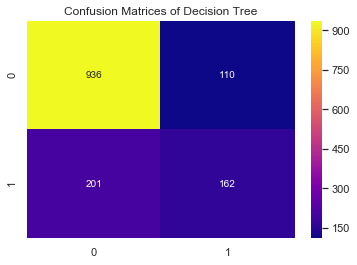

In [39]:
y_pred,dot_data,model=dtc(x_train,y_train,5)
graph = graphviz.Source(dot_data, format='png')
#graph
graph.render("tree_depth_5") # doctest: +SKIP
Image(filename = "tree_depth_5.png", width=1000, height=1000)
grad_ens_conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(grad_ens_conf_matrix, annot=True, fmt='', cmap=plt.cm.plasma);
title = 'Confusion Matrices of Decision Tree'
plt.title(title);
ACC,MSE,MAE,R2 = get_accuracy(y_test, y_pred)
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Mean Squared Error: ',MSE)
print('Explained Variance Score: ',MAE)
print('R2: ',R2)
pred_report.loc['5'] = ["5",accuracy_score(y_test, y_pred),MSE,MAE,R2]

'tree_depth_6.png'

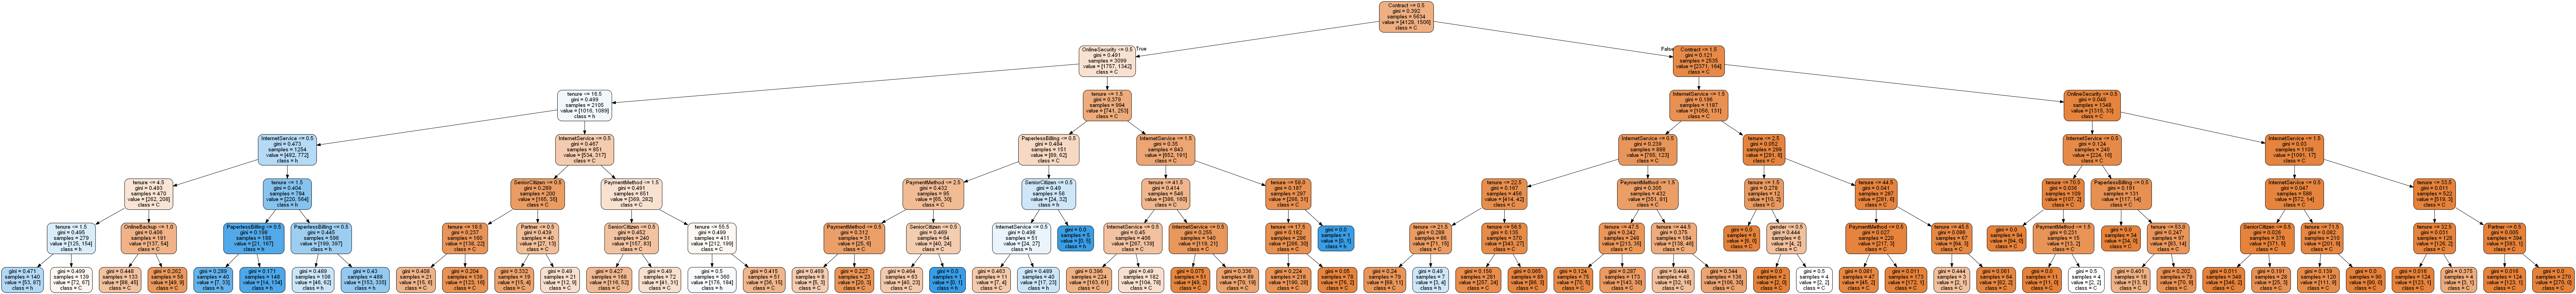

Text(0.5, 1.0, 'Confusion Matrices of Decision Tree')

Accuracy:  0.7750177430801988
Mean Squared Error:  0.22498225691980128
Explained Variance Score:  -0.17380655152252555
R2:  -0.1763375103371625


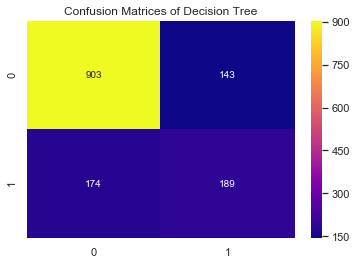

In [40]:
y_pred,dot_data,model=dtc(x_train,y_train,6)
graph = graphviz.Source(dot_data, format='png')
#graph
graph.render("tree_depth_6") # doctest: +SKIP
Image(filename = "tree_depth_6.png", width=1000, height=1000)
grad_ens_conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(grad_ens_conf_matrix, annot=True, fmt='', cmap=plt.cm.plasma);
title = 'Confusion Matrices of Decision Tree'
plt.title(title);
ACC,MSE,MAE,R2 = get_accuracy(y_test, y_pred)
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Mean Squared Error: ',MSE)
print('Explained Variance Score: ',MAE)
print('R2: ',R2)
pred_report.loc['6'] = ["6",accuracy_score(y_test, y_pred),MSE,MAE,R2]

'tree_depth_7.png'

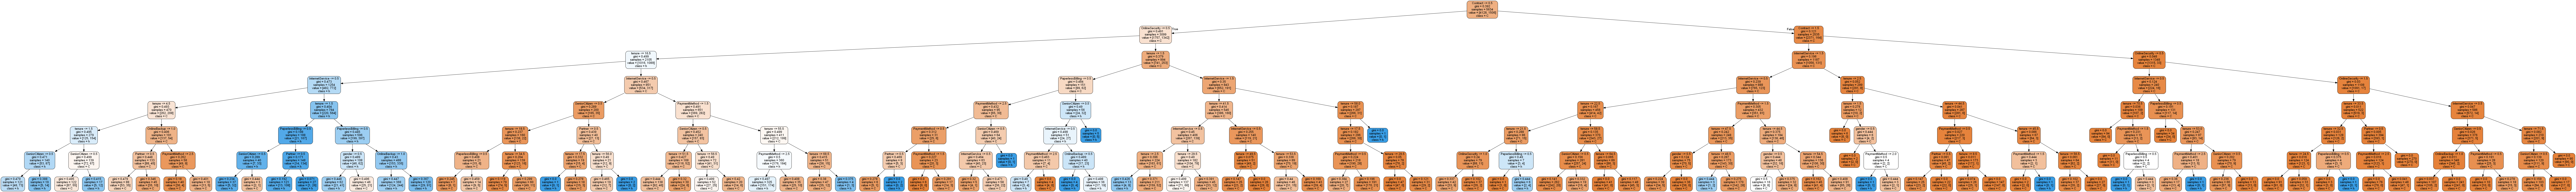

Text(0.5, 1.0, 'Confusion Matrices of Decision Tree')

Accuracy:  0.7735982966643009
Mean Squared Error:  0.2264017033356991
Explained Variance Score:  -0.1757923402282866
R2:  -0.1837591980995421


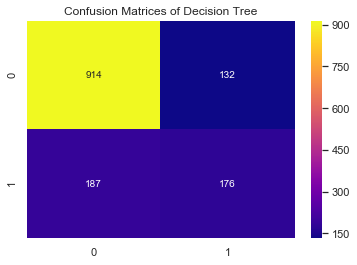

In [41]:
y_pred,dot_data,model=dtc(x_train,y_train,7)
graph = graphviz.Source(dot_data, format='png')
#graph
graph.render("tree_depth_7") # doctest: +SKIP
Image(filename = "tree_depth_7.png", width=1000, height=1000)
grad_ens_conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(grad_ens_conf_matrix, annot=True, fmt='', cmap=plt.cm.plasma);
title = 'Confusion Matrices of Decision Tree'
plt.title(title);
ACC,MSE,MAE,R2 = get_accuracy(y_test, y_pred)
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Mean Squared Error: ',MSE)
print('Explained Variance Score: ',MAE)
print('R2: ',R2)
pred_report.loc['7'] = ["7",accuracy_score(y_test, y_pred),MSE,MAE,R2]

In [42]:
pred_report

Depth  Accuracy Mean Squared Error Explained Variance Score        R2
2     2  0.729595           0.270405                -0.343857 -0.413832
3     3  0.770759           0.229241                -0.191205 -0.198603
4     4  0.777147           0.222853               -0.0960869 -0.165205
5     5  0.779276           0.220724                -0.132263 -0.154072
6     6  0.775018           0.224982                -0.173807 -0.176338
7     7  0.773598           0.226402                -0.175792 -0.183759

From above, we obtain that the accuracy is the best when max-depth is 4

Now we use hyperparameter to obtain the best max-depth.

Text(0.5, 1.0, 'Confusion Matrices of Decision Tree')

Model with best params is :
LogisticRegression {'max_depth': 5}
Accuracy:  0.7792760823278921
Mean Squared Error:  0.2207239176721079
Explained Variance Score:  -0.13226300902296018
R2:  -0.15407244705002388


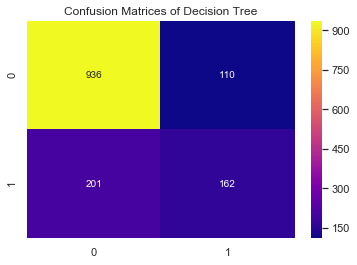

In [43]:
clf_dtc = tree.DecisionTreeClassifier()
model2=clf_dtc.fit(x_train, y_train)
y_pred2 = clf_dtc.predict(x_test)
#Run GridSearchCV to Get hyperparameter
params = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]}
clf_dtc=GridSearchCV(clf_dtc,param_grid=params,cv = 10,iid=False)
model2=clf_dtc.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
grad_ens_conf_matrix = metrics.confusion_matrix(y_test, y_pred2)
sns.heatmap(grad_ens_conf_matrix, annot=True, fmt='', cmap=plt.cm.plasma);
title = 'Confusion Matrices of Decision Tree'
plt.title(title);
ACC2,MSE2,MAE2,R22 = get_accuracy(y_test, y_pred2)
print("Model with best params is :")
print("LogisticRegression",clf_dtc.best_params_)
print('Accuracy: ',accuracy_score(y_test, y_pred2))
print('Mean Squared Error: ',MSE2)
print('Explained Variance Score: ',MAE2)
print('R2: ',R22)

In [56]:
scoring = 'accuracy'
models = []
models.append(('LR', model1))
models.append(('DTC', model2))
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, random_state=seed)
   cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.780617 (0.017020)
DTC: 0.793575 (0.020048)


Text(0.5, 0.98, 'Algorithm Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x21240905c88>,
 'caps': [<matplotlib.lines.Line2D at 0x21240931be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x212409055f8>,
 'medians': [<matplotlib.lines.Line2D at 0x21240931a58>,
 'fliers': [<matplotlib.lines.Line2D at 0x21240931160>,
 'means': []}

[Text(0, 0, 'LR'), Text(0, 0, 'DTC')]

[]

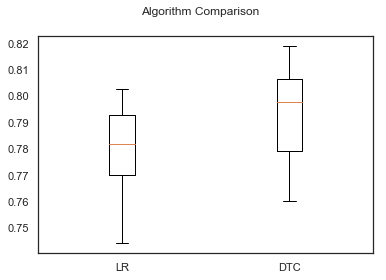

In [57]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.plot()

The Decision Tree Classifier looks like the best option regarding the plot the result above. Using it on the test data now:

In [46]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.7125621007806955
[[848 198]
 [207 156]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1046
           1       0.44      0.43      0.44       363

   micro avg       0.71      0.71      0.71      1409
   macro avg       0.62      0.62      0.62      1409
weighted avg       0.71      0.71      0.71      1409



This table shows that our model have a good overall prediction, however what is more important is not to predict exactly the clients that will leave but to have the probability of the client leaving or not, but we can still get some a information from this model about the features that are most important, for that I will look for the coefficients of the model.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

[0.         0.00300465 0.         0.15886776 0.11613234 0.14590517
 0.01107323 0.56076859 0.00084348 0.00340478]


Text(0.5, 1.0, 'Attributes Importance for Decision Tree Classifier')

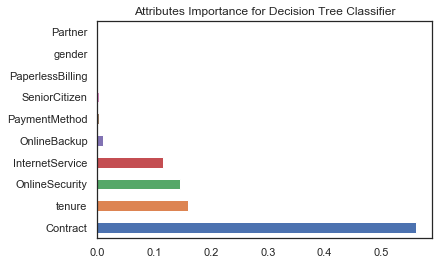

In [47]:
X = dataset[x_columns]  #independent columns
y = dataset['Churn']    #target column i.e price range
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
model = DecisionTreeClassifier(max_depth=5)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(len(x_columns)).plot(kind='barh')
plt.title("Attributes Importance for Decision Tree Classifier")
plt.show()